In [36]:
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# 创建一个4x4的矩阵,从上到下依次为AA,AB,AA',AB'
matrix = np.array([
    [1, 2, 0, -1.0656, -1.3863],
    [1, -1, -1, -0.1459, -2.3651],
    [1, -1, 1, -0.0165, -2.2396]
])
print(matrix)

[[ 1.      2.      0.     -1.0656 -1.3863]
 [ 1.     -1.     -1.     -0.1459 -2.3651]
 [ 1.     -1.      1.     -0.0165 -2.2396]]


In [8]:
D_matrix = np.array([
    [matrix[0, 0], matrix[0, 1], matrix[0, 2]],
    [matrix[1, 0], matrix[1, 1], matrix[1, 2]],
    [matrix[2, 0], matrix[2, 1], matrix[2, 2]]
])
D_determinant = np.linalg.det(D_matrix)

In [9]:
D1_matrix = np.array([
    [matrix[0, 3], matrix[0, 1], matrix[0, 2]],
    [matrix[1, 3], matrix[1, 1], matrix[1, 2]],
    [matrix[2, 3], matrix[2, 1], matrix[2, 2]]
])
D1_determinant = np.linalg.det(D1_matrix)

In [10]:
D4_matrix = np.array([
    [matrix[0, 4], matrix[0, 1], matrix[0, 2]],
    [matrix[1, 4], matrix[1, 1], matrix[1, 2]],
    [matrix[2, 4], matrix[2, 1], matrix[2, 2]]
])
D4_determinant = np.linalg.det(D4_matrix)

In [11]:
D2_matrix = np.array([
    [matrix[0, 0], matrix[0, 3], matrix[0, 2]],
    [matrix[1, 0], matrix[1, 3], matrix[1, 2]],
    [matrix[2, 0], matrix[2, 3], matrix[2, 2]]
])
D2_determinant = np.linalg.det(D2_matrix)

In [12]:
D5_matrix = np.array([
    [matrix[0, 0], matrix[0, 4], matrix[0, 2]],
    [matrix[1, 0], matrix[1, 4], matrix[1, 2]],
    [matrix[2, 0], matrix[2, 4], matrix[2, 2]]
])
D5_determinant = np.linalg.det(D5_matrix)

In [13]:
D3_matrix = np.array([
    [matrix[0, 0], matrix[0, 1], matrix[0, 3]],
    [matrix[1, 0], matrix[1, 1], matrix[1, 3]],
    [matrix[2, 0], matrix[2, 1], matrix[2, 3]]
])
D3_determinant = np.linalg.det(D3_matrix)

In [14]:
D6_matrix = np.array([
    [matrix[0, 0], matrix[0, 1], matrix[0, 4]],
    [matrix[1, 0], matrix[1, 1], matrix[1, 4]],
    [matrix[2, 0], matrix[2, 1], matrix[2, 4]]
])
D6_determinant = np.linalg.det(D6_matrix)

In [16]:
C0_CBM = round(D1_determinant/D_determinant, 6)
A_CBM = round(D2_determinant/D_determinant, 6)
B_CBM = round(D3_determinant/D_determinant, 6)
print("C0_CBM = " + str(C0_CBM) + " , A_CBM = " + str(A_CBM) + " , B_CBM = " + str(B_CBM))

C0_CBM = -0.409333 , A_CBM = -0.328133 , B_CBM = 0.0647


In [28]:
phi_CBM = math.atan(B_CBM/A_CBM/np.sqrt(3))
C_CBM = A_CBM/3/math.cos(phi_CBM)
print("C0_CBM = " + str(C0_CBM) + " , phi_CBM = " + str(phi_CBM) + " , C_CBM = " + str(C_CBM))

C0_CBM = -0.409333 , phi_CBM = -0.11335172152927375 , C_CBM = -0.1100841239044705


In [17]:
C0_VBM = round(D4_determinant/D_determinant, 6)
A_VBM = round(D5_determinant/D_determinant, 6)
B_VBM = round(D6_determinant/D_determinant, 6)
print("C0_VBM = " + str(C0_VBM) + " , A_VBM = " + str(A_VBM) + " , B_VBM = " + str(B_VBM))

C0_VBM = -1.997 , A_VBM = 0.30535 , B_VBM = 0.06275


In [29]:
phi_VBM = math.atan(B_VBM/A_VBM/np.sqrt(3))
C_VBM = A_VBM/3/math.cos(phi_VBM)
print("C0_VBM = " + str(C0_VBM) + " , phi_VBM = " + str(phi_VBM) + " , C_VBM = " + str(C_VBM))

C0_VBM = -1.997 , phi_VBM = 0.11809449344117022 , C_VBM = 0.1024972321216168


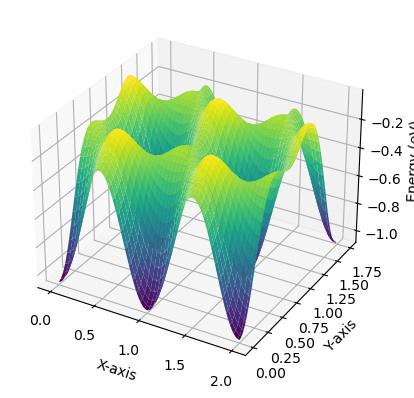

In [38]:
# 绘制周期势能图CBM
# 定义一个二维网格
s = np.linspace(0, 2, 100)
t = np.linspace(0, np.sqrt(3), 100)
s, t = np.meshgrid(s, t)

# 定义势能函数，这里使用一个简单的例子
def potential_energy(x, y):
    G = 4 * np.pi/np.sqrt(3)
    potential_energy = C0_CBM + 2*C_CBM*np.cos(phi_CBM-G*t) + 4*C_CBM*np.cos(phi_CBM+G*t/2)*np.cos(np.sqrt(3)*G*s/2)
    return potential_energy

# 计算势能值
z = potential_energy(s, t)

# 创建一个三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制势能图
ax.plot_surface(s, t, z, cmap='viridis')

# 设置坐标轴标签
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Energy (eV)')

# 显示图形
plt.show()

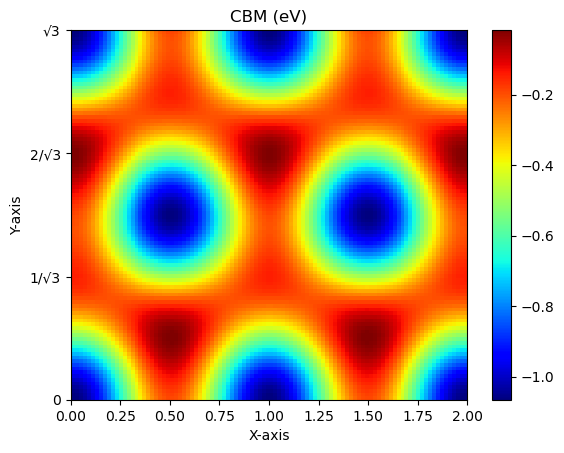

In [44]:
# 绘制CBM热图
plt.imshow(z, cmap='jet', extent=[0, 2, 0, np.sqrt(3)], origin='lower', aspect='auto')

# 添加颜色条
plt.colorbar()

# 添加坐标轴标签
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(np.linspace(0, np.sqrt(3), 4), ['0', '1/√3', '2/√3', '√3'])

# 添加标题
plt.title('CBM (eV)')

# 显示图像
plt.show()

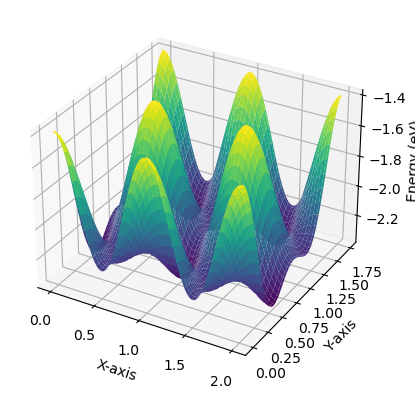

In [45]:
# 绘制周期势能图VBM
# 定义一个二维网格
s = np.linspace(0, 2, 100)
t = np.linspace(0, np.sqrt(3), 100)
s, t = np.meshgrid(s, t)

# 定义势能函数，这里使用一个简单的例子
def potential_energy(x, y):
    G = 4 * np.pi/np.sqrt(3)
    potential_energy = C0_VBM + 2*C_VBM*np.cos(phi_VBM-G*t) + 4*C_VBM*np.cos(phi_VBM+G*t/2)*np.cos(np.sqrt(3)*G*s/2)
    return potential_energy

# 计算势能值
z = potential_energy(s, t)

# 创建一个三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制势能图
ax.plot_surface(s, t, z, cmap='viridis')

# 设置坐标轴标签
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Energy (eV)')

# 显示图形
plt.show()

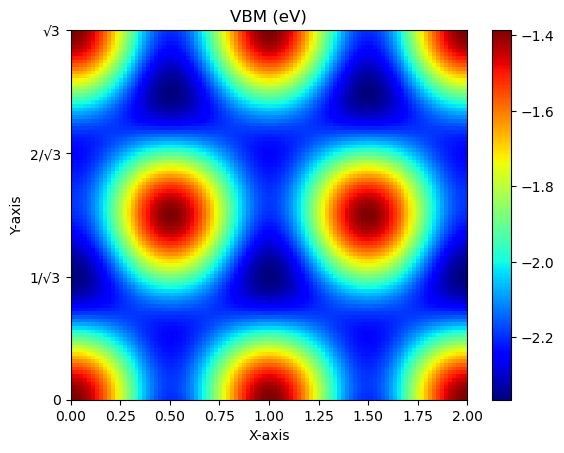

In [47]:
# 绘制VBM热图
plt.imshow(z, cmap='jet', extent=[0, 2, 0, np.sqrt(3)], origin='lower', aspect='auto')

# 添加颜色条
plt.colorbar()

# 添加坐标轴标签
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.yticks(np.linspace(0, np.sqrt(3), 4), ['0', '1/√3', '2/√3', '√3'])

# 添加标题
plt.title('VBM (eV)')

# 显示图像
plt.show()